In [1]:
import xgboost
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

In [3]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [4]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [5]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [6]:
mov_feat_test_pred = model.predict(feat_test)

In [7]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [8]:
r2 = r2_score(mov_features_test, mov_feat_test_pred)
print("R2: {}".format(r2))

R2: 0.6833296545847586


In [9]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [10]:
R[0,1]

0.8269507259862952

In [11]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [12]:
print(np.mean(cv_score), np.std(cv_score))

0.6755994660461122 0.056907873802771805


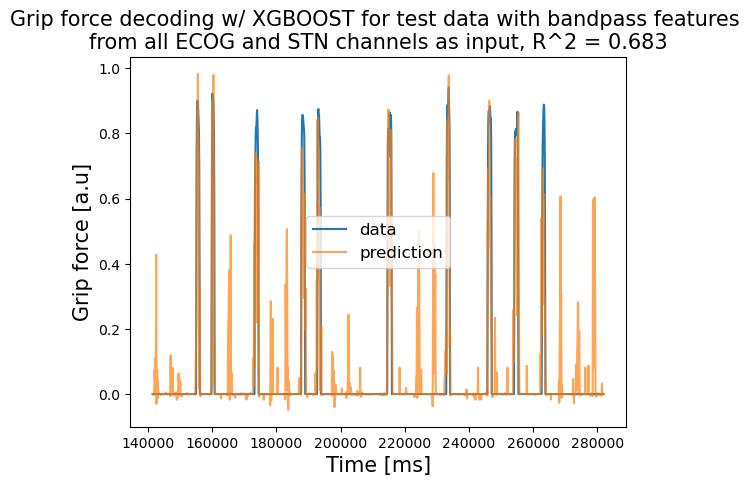

In [13]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## Try fft features

In [14]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='fft').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [15]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [16]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
mov_feat_test_pred = model.predict(feat_test)

In [18]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [19]:
r2 = r2_score(mov_features_test, mov_feat_test_pred, multioutput='raw_values')
print("R2: {}".format(r2))

R2: [0.2354009]


In [20]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [21]:
R[0,1]

0.581659154945348

In [22]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [23]:
print(np.mean(cv_score), np.std(cv_score))

0.3057697181648574 0.2112866746389942


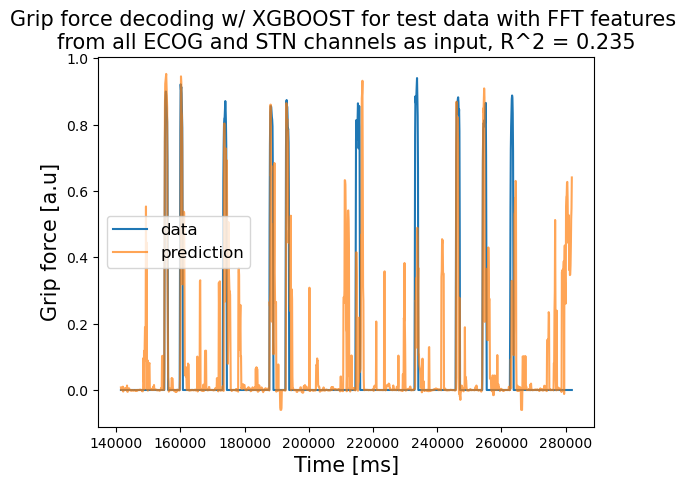

In [24]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with FFT features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## Try Hjorth features

In [25]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='Hjorth').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [26]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [27]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [28]:
mov_feat_test_pred = model.predict(feat_test)

In [29]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [30]:
r2 = r2_score(mov_features_test, mov_feat_test_pred, multioutput='raw_values')
print("R2: {}".format(r2))

R2: [0.5079101]


In [31]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [32]:
R[0,1]

0.7616005694007103

In [33]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [34]:
print(np.mean(cv_score), np.std(cv_score))

0.661707319730636 0.0763051765042889


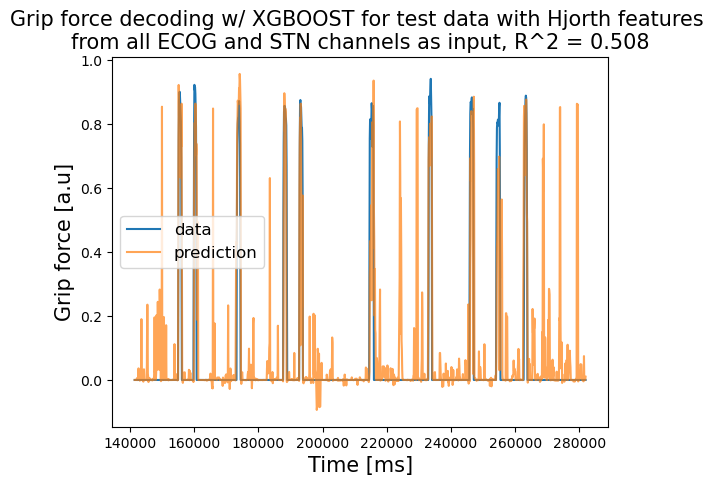

In [35]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with Hjorth features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()